# MNIST DATASET 

In [102]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
mnist=pd.read_csv(r"C:\Users\30697\KAGGLE\MNIST DATASET\mnist_784.csv")

In [5]:
mnist.shape

(70000, 785)

In [7]:
# we will use 80% for training and cross validation and 20% for testing

In [9]:
mnist.head() # our target column is class

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [11]:
y=mnist["class"]
X=mnist.drop(["class"],axis=1)

In [13]:
X.head() # we dropped the target column from the main dataset so now we can split them all

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler=StandardScaler()

In [19]:
X_scaled=scaler.fit_transform(X)

In [21]:
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42,stratify=y)

In [25]:
X_train.shape

(56000, 784)

In [27]:
y_train.shape

(56000,)

## Now we will try some classifiers and their perfomance

In [30]:
# since our target has 10 classes i ll go with multi-class classifiers such that RandomForest, SGDclassifier and SecisionTrees

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [43]:
rf_clf=RandomForestClassifier(n_estimators=150,max_depth=15,min_samples_split=4,random_state=42,n_jobs=-1)

In [49]:
sgd_clf=SGDClassifier(loss="log_loss",alpha=0.001,penalty="l2",max_iter=1000,random_state=42)

In [51]:
dt_clf=DecisionTreeClassifier(max_depth=10,min_samples_split=4,criterion="gini",random_state=42)

In [ ]:
# train our clfs

In [55]:
rf_clf.fit(X_train, y_train)
sgd_clf.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_split=4, random_state=42)

In [61]:
rf_preds=rf_clf.predict(X_test)
rf_preds

array([7, 3, 1, ..., 6, 2, 8], dtype=int64)

In [65]:
sgd_preds=sgd_clf.predict(X_test)
sgd_preds

array([7, 3, 1, ..., 6, 2, 5], dtype=int64)

In [67]:
dt_preds=dt_clf.predict(X_test)
dt_preds

array([7, 3, 1, ..., 6, 2, 5], dtype=int64)

In [69]:
### TIME FOR SOME METRICS FOR PREDICTIONS

In [71]:
from sklearn.metrics import accuracy_score, classification_report

In [77]:
print("RF Accuracy:", accuracy_score(y_test, rf_preds))
print("SGD Accuracy:", accuracy_score(y_test, sgd_preds))
print("DT Accuracy:", accuracy_score(y_test, dt_preds))

RF Accuracy: 0.9632142857142857
SGD Accuracy: 0.909
DT Accuracy: 0.8607142857142858


In [83]:
print( classification_report(y_test, rf_preds))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1381
           1       0.98      0.98      0.98      1575
           2       0.96      0.96      0.96      1398
           3       0.96      0.95      0.96      1428
           4       0.97      0.96      0.96      1365
           5       0.97      0.95      0.96      1263
           6       0.97      0.98      0.98      1375
           7       0.97      0.96      0.96      1459
           8       0.95      0.95      0.95      1365
           9       0.92      0.94      0.93      1391

    accuracy                           0.96     14000
   macro avg       0.96      0.96      0.96     14000
weighted avg       0.96      0.96      0.96     14000



In [85]:
print( classification_report(y_test, sgd_preds))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1381
           1       0.95      0.97      0.96      1575
           2       0.92      0.88      0.90      1398
           3       0.90      0.87      0.88      1428
           4       0.93      0.91      0.92      1365
           5       0.87      0.84      0.85      1263
           6       0.92      0.95      0.94      1375
           7       0.93      0.93      0.93      1459
           8       0.84      0.88      0.86      1365
           9       0.88      0.89      0.88      1391

    accuracy                           0.91     14000
   macro avg       0.91      0.91      0.91     14000
weighted avg       0.91      0.91      0.91     14000



In [87]:
print( classification_report(y_test, dt_preds))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1381
           1       0.94      0.96      0.95      1575
           2       0.82      0.85      0.84      1398
           3       0.82      0.82      0.82      1428
           4       0.84      0.86      0.85      1365
           5       0.80      0.80      0.80      1263
           6       0.90      0.86      0.88      1375
           7       0.92      0.89      0.90      1459
           8       0.83      0.79      0.81      1365
           9       0.80      0.83      0.81      1391

    accuracy                           0.86     14000
   macro avg       0.86      0.86      0.86     14000
weighted avg       0.86      0.86      0.86     14000



In [97]:
from sklearn.metrics import confusion_matrix

In [91]:
cmrf = confusion_matrix(y_test, rf_preds)
print(cmrf)

[[1367    1    0    0    1    1    3    0    7    1]
 [   0 1550    7    6    1    1    3    5    1    1]
 [   9    1 1346    5    5    0    7   13   10    2]
 [   3    2   17 1358    0   16    3   12   13    4]
 [   4    3    1    0 1304    0    9    1    3   40]
 [   5    4    3   13    1 1205   10    2    8   12]
 [   9    3    1    0    3    5 1348    0    6    0]
 [   1    9   15    0    8    0    0 1401    2   23]
 [   3    7    7    9    2    9    5    1 1297   25]
 [   7    8    0   18   19    1    2   14   13 1309]]


In [93]:
cmsgd = confusion_matrix(y_test, sgd_preds)
print(cmsgd)

[[1331    0    4    1    4   16   11    0   14    0]
 [   0 1520    6   11    0    9    4    5   18    2]
 [  17    9 1226   25   23    9   32   15   38    4]
 [   9    4   31 1241    0   59    7   16   45   16]
 [   5    6    8    3 1241    1   17    4   27   53]
 [  14    5    5   52   11 1058   28   10   49   31]
 [  11    2    9    0   10   18 1310    0   15    0]
 [   6    7   19    5   10    2    1 1364    7   38]
 [  13   27   14   27    2   41   10    5 1198   28]
 [  10   12    4   18   33   10    2   42   23 1237]]


In [95]:
cmdt = confusion_matrix(y_test, dt_preds)
print(cmdt)

[[1286    2   18   12    5   17   16    5   15    5]
 [   1 1506   26   10    9    4    2    8    8    1]
 [  23   11 1188   24   25   16   27   18   47   19]
 [   6    6   49 1178   15   57   13   19   41   44]
 [   7    9   19    4 1168   12    9   12   21  104]
 [  27    6   16   81   19 1013   35    7   26   33]
 [  31   12   27   26   32   43 1177    7   16    4]
 [   3   14   34   31   12   18    2 1298   10   37]
 [  16   29   47   32   28   48   19   15 1080   51]
 [   9   13   21   30   72   32    6   22   30 1156]]


### NN CLASSIFIER

In [126]:
X_train_2,X_valid,y_train_2,y_valid=train_test_split(X_train,y_train,test_size=0.1,random_state=42)

In [164]:
input_dim = 784
num_classes = 10

In [166]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(input_dim,)),      
    tf.keras.layers.Dense(128, activation="relu"),  
    tf.keras.layers.Dense(64, activation="relu"),   
    tf.keras.layers.Dense(num_classes, activation="softmax") 
])

In [168]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [170]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [174]:
history_model=model.fit(X_train_2,y_train_2,epochs=20,validation_data=(X_valid,y_valid))

Epoch 1/20
1575/1575 [==============================] - 4s 2ms/step - loss: 0.2548 - accuracy: 0.9282 - val_loss: 0.1561 - val_accuracy: 0.9568
Epoch 2/20
1575/1575 [==============================] - 3s 2ms/step - loss: 0.1020 - accuracy: 0.9690 - val_loss: 0.1394 - val_accuracy: 0.9623
Epoch 3/20
1575/1575 [==============================] - 3s 2ms/step - loss: 0.0733 - accuracy: 0.9777 - val_loss: 0.1454 - val_accuracy: 0.9625
Epoch 4/20
1575/1575 [==============================] - 3s 2ms/step - loss: 0.0529 - accuracy: 0.9834 - val_loss: 0.1743 - val_accuracy: 0.9627
Epoch 5/20
1575/1575 [==============================] - 3s 2ms/step - loss: 0.0466 - accuracy: 0.9849 - val_loss: 0.1745 - val_accuracy: 0.9643
Epoch 6/20
1575/1575 [==============================] - 3s 2ms/step - loss: 0.0350 - accuracy: 0.9890 - val_loss: 0.1524 - val_accuracy: 0.9682
Epoch 7/20
1575/1575 [==============================] - 3s 2ms/step - loss: 0.0295 - accuracy: 0.9905 - val_loss: 0.1445 - val_accuracy:

In [187]:
model.evaluate(X_test,y_test)

438/438 [==============================] - 3s 4ms/step - loss: 0.4429 - accuracy: 0.9701


[0.44290891289711, 0.9701428413391113]

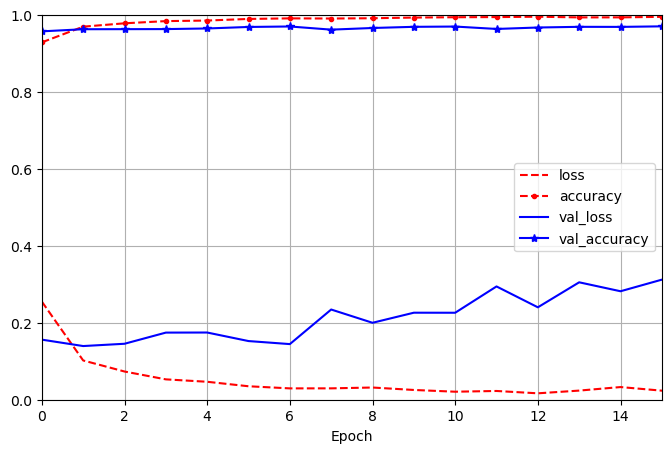

In [258]:
pd.DataFrame(history_model.history).plot(
    figsize=(8,5),xlim=[0,15],ylim=[0,1],grid=True,xlabel="Epoch",
    style=["r--","r--.","b-","b-*"])
plt.show()

In [185]:
from sklearn.metrics import classification_report

In [215]:
nn_preds=model.predict(X_test)

438/438 [==============================] - 2s 3ms/step


In [223]:
nn_predictions=np.argmax(nn_preds,axis=1) # we transform our predictions from probabilities to predictions

In [225]:
nn_predictions

array([7, 3, 1, ..., 6, 2, 8], dtype=int64)

In [231]:
report=classification_report(y_test,nn_predictions)


In [233]:
print(report)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1381
           1       0.99      0.98      0.99      1575
           2       0.97      0.97      0.97      1398
           3       0.96      0.97      0.96      1428
           4       0.97      0.97      0.97      1365
           5       0.98      0.95      0.96      1263
           6       0.97      0.98      0.98      1375
           7       0.96      0.97      0.97      1459
           8       0.97      0.95      0.96      1365
           9       0.95      0.95      0.95      1391

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



In [ ]:
# and this is the simplest classification report without exploring more options. just the basics.